In [2]:
from google.colab import files
uplaod = files.upload()

Saving Valid.csv to Valid.csv


In [20]:
import pandas as pd
data = pd.read_csv('Valid.csv')
data['label'].replace([0, 1], ['tidak_bagus','bagus'], inplace=True)
categori = pd.get_dummies(data.label)
data_baru = pd.concat([data, categori],axis = 1)
data_baru = data_baru.drop(columns=['label'])
data_baru.head()

,text,bagus,tidak_bagus
0,It's been about 14 years since Sharon Stone aw...,0,1
1,someone needed to make a car payment... this i...,0,1
2,The Guidelines state that a comment must conta...,0,1
3,This movie is a muddled mish-mash of clichés f...,0,1
4,Before Stan Laurel became the smaller half of ...,0,1


In [32]:
review = data_baru['text'].values
label = data_baru[[
    'tidak_bagus',
    'bagus'
]].values

from sklearn.model_selection import train_test_split
review_latih,review_test,  label_latih,label_test = train_test_split(review, label, test_size=0.2 )

#penggunaan token
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='s')
tokenizer.fit_on_texts(review_latih)
tokenizer.fit_on_texts(review_test)

sekuens_latih = tokenizer.texts_to_sequences(review_latih)
sekuens_test = tokenizer.texts_to_sequences(review_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics = ['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >

            90%!")
      self.model.stop_training = True
callbacks = myCallback()

hist = model.fit(padded_latih, label_latih, batch_size=128, epochs=50,
                    validation_data=(padded_test, label_test), verbose=2,callbacks=[callbacks])


Epoch 1/50
32/32 - 48s - loss: 0.6931 - accuracy: 0.5128 - val_loss: 0.6925 - val_accuracy: 0.5040 - 48s/epoch - 2s/step
Epoch 2/50
32/32 - 46s - loss: 0.6748 - accuracy: 0.6637 - val_loss: 0.5897 - val_accuracy: 0.7860 - 46s/epoch - 1s/step
Epoch 3/50
32/32 - 46s - loss: 0.5196 - accuracy: 0.7968 - val_loss: 0.5222 - val_accuracy: 0.7670 - 46s/epoch - 1s/step
Epoch 4/50
32/32 - 46s - loss: 0.3284 - accuracy: 0.8815 - val_loss: 0.4000 - val_accuracy: 0.8240 - 46s/epoch - 1s/step
Epoch 5/50

Akurasi telah mencapai >90%!
32/32 - 47s - loss: 0.2236 - accuracy: 0.9222 - val_loss: 0.4807 - val_accuracy: 0.7780 - 47s/epoch - 1s/step


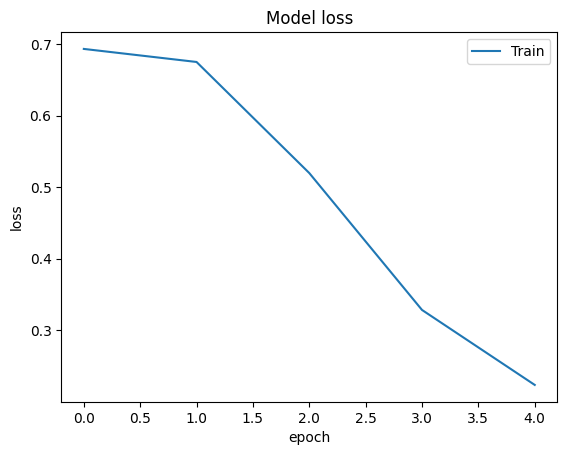

In [35]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

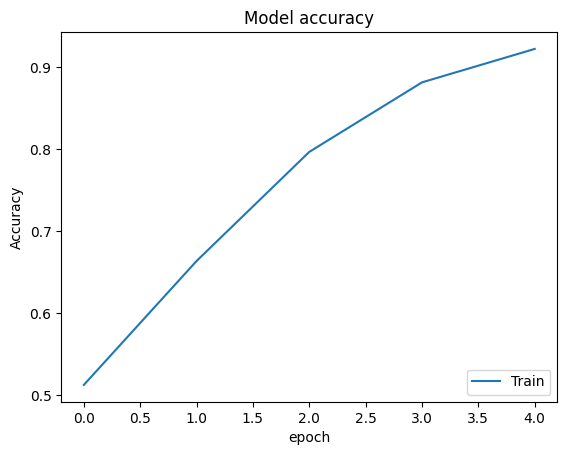

In [36]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='lower right')
plt.show()